In [16]:
using ModelingToolkit, MethodOfLines, DomainSets, NonlinearSolve

@parameters x S
@variables u(..)
# Dxx = Differential(x)^2
# Dyy = Differential(y)^2

Dx = Differential(x)
DS = Differential(S)


(::Differential) (generic function with 2 methods)

In [17]:
using Random, Distributions

In [18]:
using Plots

In [19]:
K =  -0.00021867

-0.00021867

In [20]:
P_S = Normal(0.09e-3^2, 0.009e-3^2)

Normal{Float64}(μ=8.100000000000001e-9, σ=8.1e-11)

In [21]:
pdf(P_S, 1)
v= 0.1

0.1

In [33]:

eq = Dx(u(x, S)*v) + DS(u(x, S)*K) ~ 0

bcs = [u(0, S) ~ pdf(P_S, S),
#     u(x, 0) ~ 0,
#     DS(u(x,0)) ~ 0.0
    u(x, 0.2e-3^2) ~ 0,
    DS(u(x,0.2e-3^2)) ~ 0.0
]


# Space and time domains
domains = [x ∈ Interval(0.0, 1.0),
           S ∈ Interval(0, 0.2e-3^2)]

@named pdesys = PDESystem([eq], bcs, domains, [x, S], [u(x, S)])

dx = 0.1
dv = 0.2e-3^2/10


4.0e-9

In [34]:

# Note that we pass in `nothing` for the time variable `t` here since we
# are creating a stationary problem without a dependence on time, only space.
discretization = MOLFiniteDifference([x => dx, S => dv], nothing, approx_order=2)

prob = discretize(pdesys, discretization)

┌ Warning: Incompatible term found. Adding auxiliary equation var"⟦-0.00021867u(x, S)⟧"(x, S) ~ -0.00021867u(x, S) to the system.
└ @ MethodOfLines ~/.julia/packages/MethodOfLines/hvRzG/src/system_parsing/pde_system_transformation.jl:214
┌ Warning: Incompatible term found. Adding auxiliary equation var"⟦0.1u(x, S)⟧"(x, S) ~ 0.1u(x, S) to the system.
└ @ MethodOfLines ~/.julia/packages/MethodOfLines/hvRzG/src/system_parsing/pde_system_transformation.jl:214


NonlinearProblem with uType Vector{Float64}. In-place: true
u0: 50-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

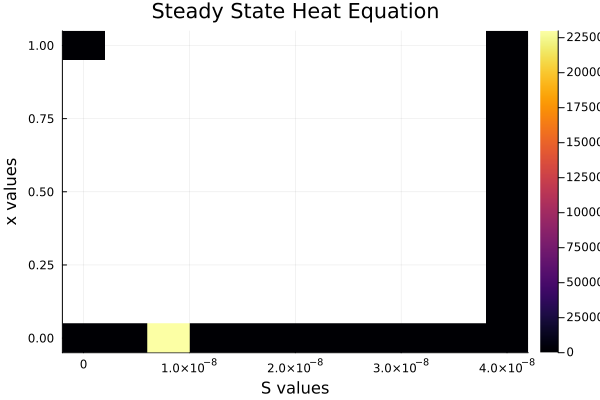

In [35]:

sol = NonlinearSolve.solve(prob, NewtonRaphson())

u_sol = sol[u(x, S)]



heatmap(sol[S], sol[x], u_sol, xlabel="S values", ylabel="x values",
        title="Steady State Heat Equation")

In [142]:
sol[y]

1.0:0.1:2.0